SAHIL AGGARWAL
INSAID ASSIGNMENT

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

In [37]:
df=pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [38]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [40]:
#change the object type columns
obj = df.select_dtypes(include = "object").columns
print(obj)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in obj:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [41]:
print(df.isnull().sum())
def clean_dataset(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

clean_dataset(df)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

print(vif_data)

           feature         VIF
0             step    2.791610
1             type    4.467405
2           amount    4.149312
3         nameOrig    2.764234
4    oldbalanceOrg  576.803777
5   newbalanceOrig  582.709128
6         nameDest    3.300975
7   oldbalanceDest   73.349937
8   newbalanceDest   85.005614
9          isFraud    1.195305
10  isFlaggedFraud    1.002587


High VIF found in old and new balance column we will combine them

In [43]:
df['ActualbalanceOrig']=((df['oldbalanceOrg']-df['newbalanceOrig']))
df['ActualbalanceDest']=((df['oldbalanceDest']-df['newbalanceDest']))

print(df)

         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     3     9839.64    757869      170136.00       160296.36   
1           1     3     1864.28   2188998       21249.00        19384.72   
2           1     4      181.00   1002156         181.00            0.00   
3           1     1      181.00   5828262         181.00            0.00   
4           1     3    11668.14   3445981       41554.00        29885.86   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13   5651847      339682.13            0.00   
6362616   743     4  6311409.28   1737278     6311409.28            0.00   
6362617   743     1  6311409.28    533958     6311409.28            0.00   
6362618   743     4   850002.52   2252932      850002.52            0.00   
6362619   743     1   850002.52    919229      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        

In [44]:
new_df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

<Axes: >

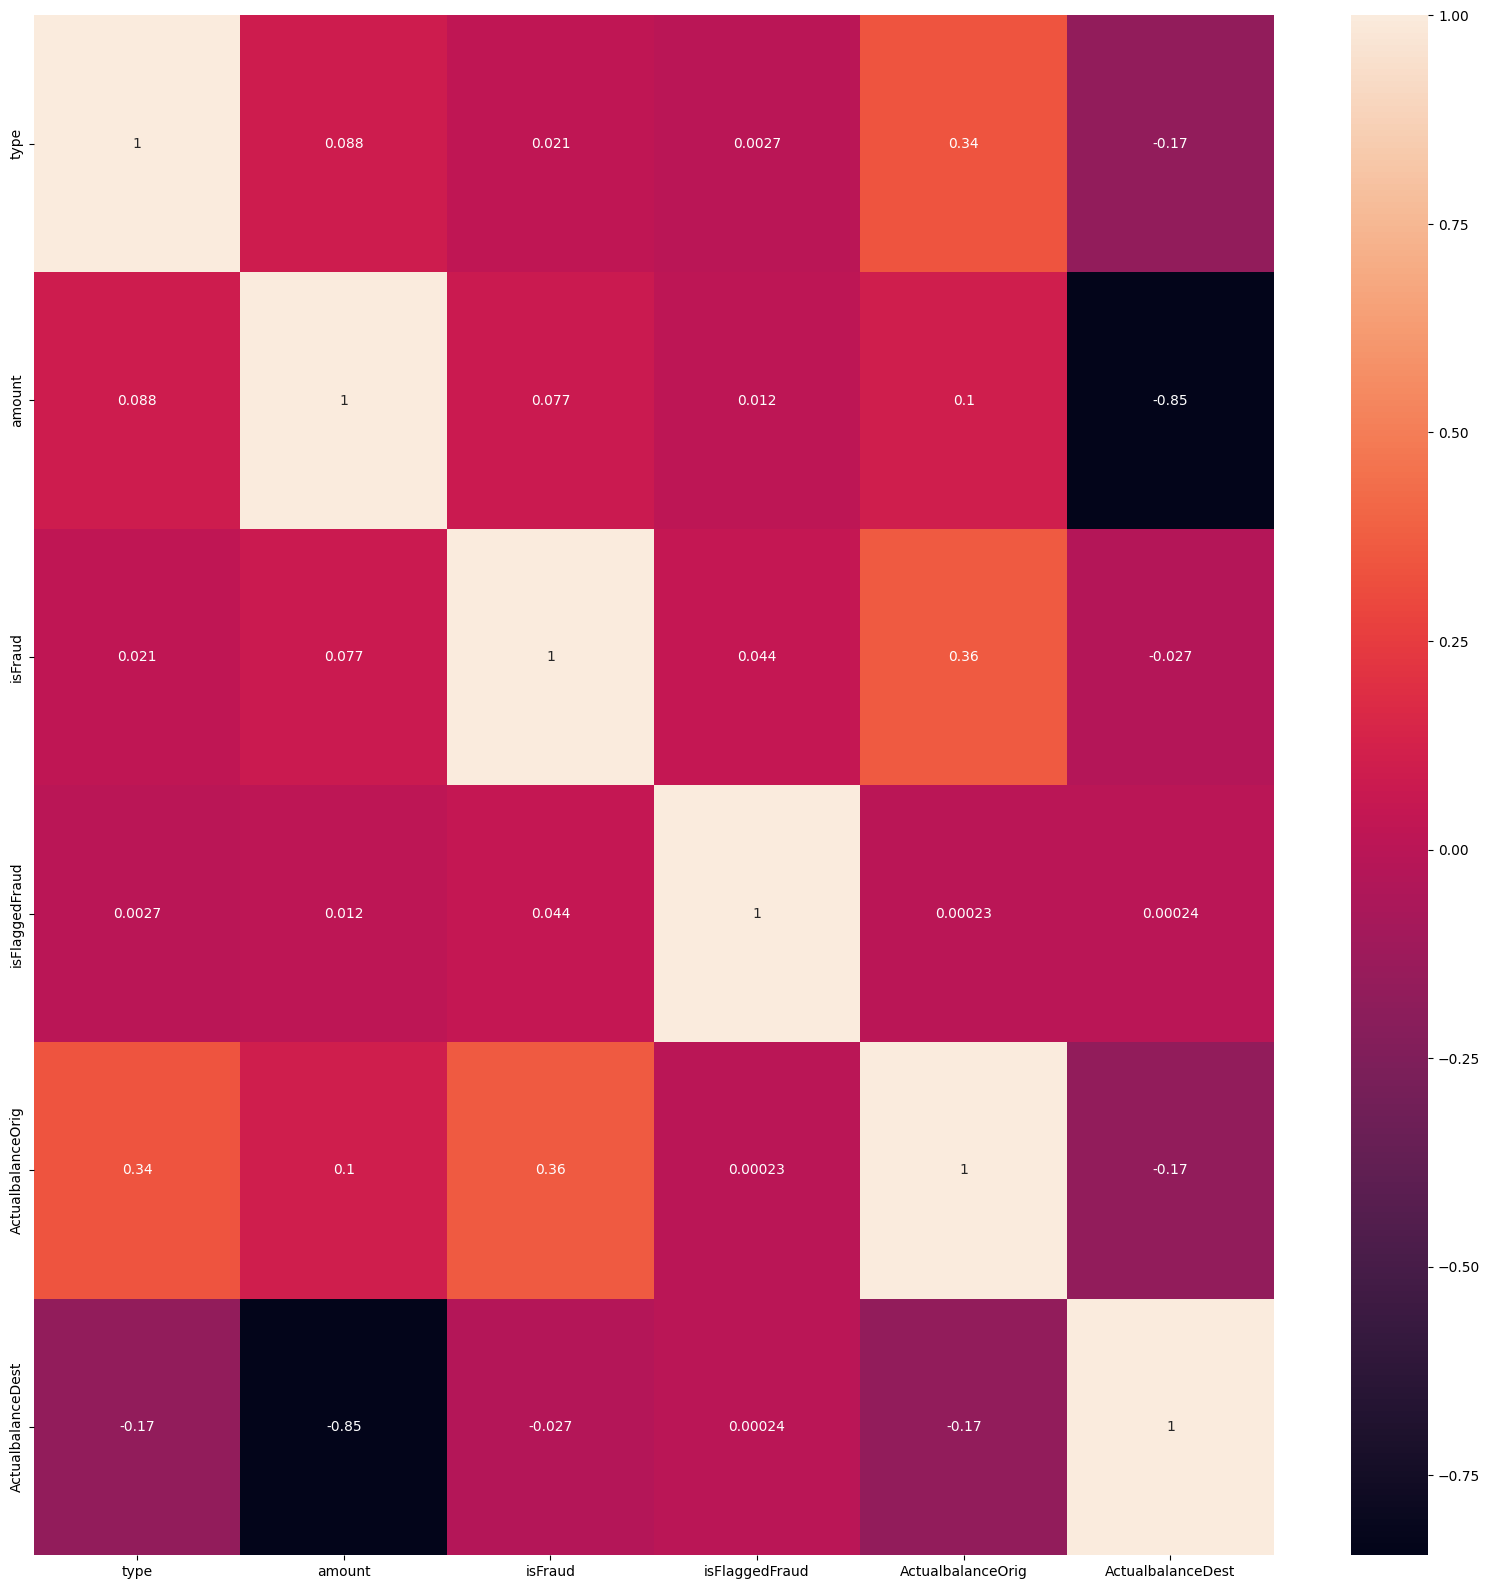

In [45]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot = True)

percentage of legit transactions=  99.87091795518198
Percentage of fraud transactions=  0.12908204481801522


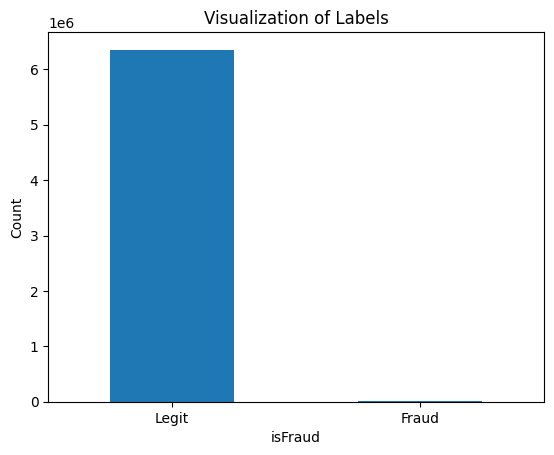

In [46]:
#check for fraud and legit transactions
x=len(new_df[new_df.isFraud==0])
y=len(new_df[new_df.isFraud==1])
print("percentage of legit transactions= ",x/(x+y)*100)
print("Percentage of fraud transactions= ",y/(x+y)*100)


labels = ["Legit", "Fraud"]
count_classes = new_df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

<Axes: >

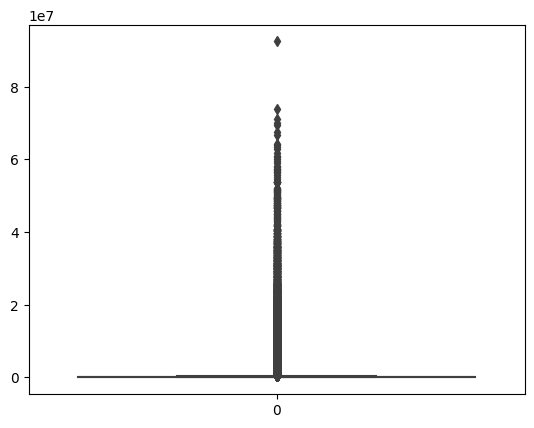

In [48]:
sns.boxplot(df.amount)

In [51]:
def remove_outliers_iqr(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df.loc[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df_cleaned

cleaned_data = remove_outliers_iqr(new_df, 'amount')

<Axes: >

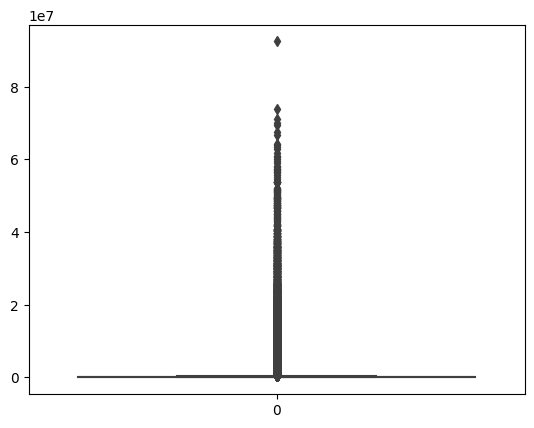

In [52]:
sns.boxplot(new_df.amount)


In [53]:
#normalize amount column
scaler = StandardScaler()
new_df["NormalAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [56]:
print(df)

         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     3     9839.64    757869      170136.00       160296.36   
1           1     3     1864.28   2188998       21249.00        19384.72   
2           1     4      181.00   1002156         181.00            0.00   
3           1     1      181.00   5828262         181.00            0.00   
4           1     3    11668.14   3445981       41554.00        29885.86   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13   5651847      339682.13            0.00   
6362616   743     4  6311409.28   1737278     6311409.28            0.00   
6362617   743     1  6311409.28    533958     6311409.28            0.00   
6362618   743     4   850002.52   2252932      850002.52            0.00   
6362619   743     1   850002.52    919229      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        

In [57]:
#train test split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state= 35)

In [60]:
#code for applying models and getting accuracy
def model(classifier,dtrain_x,dtrain_y,dtest_x,dtest_y):
    classifier.fit(dtrain_x,dtrain_y)

    prediction=classifier.predict(dtest_x)

    print('Validation accuracy of model is', accuracy_score(prediction,dtest_y))
    print ("\nClassification report :\n",(classification_report(dtest_y,prediction)))

    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)




RANDOM FOREST CLASSIFIER

Validation accuracy of model is 0.9993296786543908

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270874
           1       0.75      0.73      0.74      1650

    accuracy                           1.00   1272524
   macro avg       0.87      0.87      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



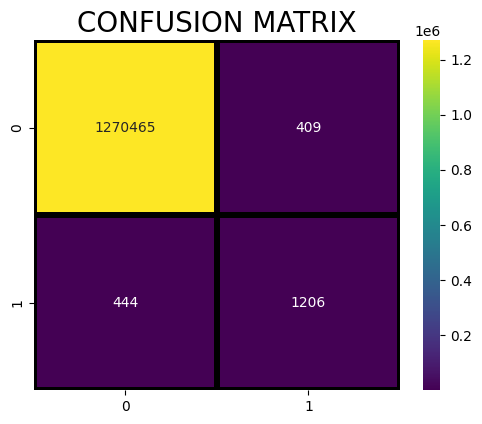

In [62]:
RF = RandomForestClassifier()
model(RF,X_train,Y_train,X_test,Y_test)

DECISION TREE CLASSIFIER

Validation accuracy of model is 0.999269168990133

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270874
           1       0.71      0.73      0.72      1650

    accuracy                           1.00   1272524
   macro avg       0.86      0.87      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



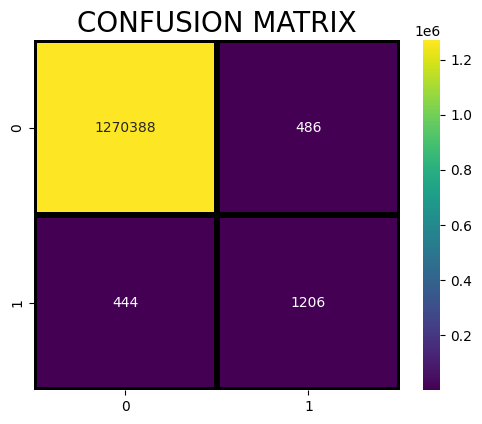

In [63]:
dt=DecisionTreeClassifier()
model(dt,X_train,Y_train,X_test,Y_test)

LOGISTIC REGRESSION

Validation accuracy of model is 0.7171526823855582

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.72      0.84   1270874
           1       0.00      0.98      0.01      1650

    accuracy                           0.72   1272524
   macro avg       0.50      0.85      0.42   1272524
weighted avg       1.00      0.72      0.83   1272524



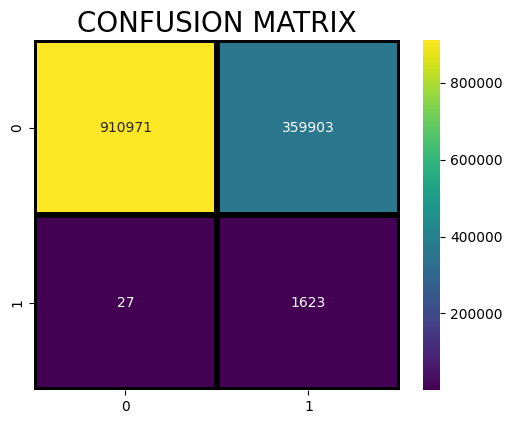

In [64]:
log_r=LogisticRegression(random_state=0)
model(log_r,X_train,Y_train,X_test,Y_test)

**1)Describe your fraud detection model in elaboration**

My fraud detection model consists of 3 types of classification models. Decision tree Random forests and logistic regression but the precision in logistic regression is not good compared to the other too. It may have better accuracy but in Fraud detection precesion is required.Also the data is highly imbalanced.
I have shown the imbalance in the logistic regression the FP are high and the precision is low thats why random forest is recommended

**2)How did you select variables to be included in the model?**

I have used the method of multicollinearity to find the VIF of the data and combined the columns with high VIF to get the net balance in respective accounts. I have also checked the null values and if any missing values but found none. Also I have changed the type of columns


**3)Demonstrate the performance of the model by using best set of tools.**

Performance is given in the form of confusion matrix

TP(Decision Tree) ~ TP(Random Forest)
FP(Decision Tree) >> FP(Random Forest)
TN(Decision Tree) < TN(Random Forest)
FN(Decision Tree) ~ FN(Random Forest)
These things show that Random forest has an edge

**4)What are the key factors that predict fraudulent customer?**

Transaction history of customer, Merchant name and origin, Amount of transaction and many more

**5)Do these factors make sense? If yes, How? If not, How not?**

The factors that I have stated are appropriate for fraud detection because a sudden jump in amount of transaction creates a flag in system that it may be fraud. The origin of some transactions have high chances of it being a fraud transaction. The merchant name may be fake.

**6)What kind of prevention should be adopted while company update its infrastructure?**

OTP should not be shared, use of secured HTTPS sites and verified sites, no unknown transactions should be made, use of secured VPN, do not click on unknown links and pickup unknown calls or even reply to unknown texts, verify from the merchant before making a transaction if the details are correct.

**7)Assuming these actions have been implemented, how would you determine if they work?**

Instant email and sms on customers id, keeping a track of your payments, changing transaction passwords regularly
